<a href="https://colab.research.google.com/github/Devendarreddybathini/Devendarreddy_INFO5731_spring2023/blob/main/In_class_exercise_04_03282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
import requests
from bs4 import BeautifulSoup
import pandas as pd

header = [] # List to store Review headings
body = [] # List to store reviews

for number in range(100):
    link = "https://www.flipkart.com/redmi-10-midnight-black-64-gb/product-reviews/itmd93641e4ebb47?pid=MOBGC9GYEBH3GZ4E&lid=LSTMOBGC9GYEBH3GZ4ESWAKTT&marketplace=FLIPKART&page=" + str(number) # Generating link dynamically
    page = requests.get(link) # Accessing the webpage
    soup = BeautifulSoup(page.text, 'html.parser')
    main_reviews = soup.find_all(class_='_2-N8zT') # Getting the Review Heading by using the class name
    text_reviews = soup.find_all(class_='t-ZTKy') # Getting the full reviews by using the class name

    for ele, sub_ele in zip(main_reviews, text_reviews): # Iterating through the list
        header.append(ele.text) # Appending to header list
        body.append(sub_ele.text) # Appending to body list

df = pd.DataFrame(list(zip(header, body)), columns =['SummaryView', 'Review'])  # Creating Dataframe
print("Length of data frame is {0}".format(len(df)))
df




Length of data frame is 990


,SummaryView,Review
0,Fabulous!,"Good phone in this price range, battery backup..."
1,Wonderful,Very nice mobile 🥳😊Performance is very good 😊C...
2,Simply awesome,Good phone very nice working and good performa...
3,Wonderful,Mobile is best in this price rangeProcessor Qu...
4,Good quality product,This phone camera is not good but you can use ...
...,...,...
985,Super!,in this price it was awesome product for meREA...
986,Terrific,GoodREAD MORE
987,Good,Not bad at this price range 🙃READ MORE
988,Not good,Stock Android Dual app not supportedOverall pe...


In [ ]:
# Write your code here
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# install pyLDAvis
#!pip install joblib==1.1.0
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# # Gensim is a popular natural language processing library for Python
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy is another NLP library for Python that is used for lemmatization
import spacy

# pyLDAvis is a library for interactive topic model visualization in Python
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
%matplotlib inline

# We enable logging for gensim to see the progress of the topic modeling process
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Cleaning the data
import re

def cleantext(Review):
    text = re.sub(r'@[A-Za-z0-9_]+', '', Review) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers
    
    return text

df["Review"] = df["Review"].apply(cleantext)

# Convert to list
data = df.Review.values.tolist()


In [ ]:
# This function takes a list of sentences as input
def sent_to_words(sentences):
    # Iterate over each sentence in the input list
    for sentence in sentences:
        # Use Gensim's simple_preprocess() function to tokenize the sentence and remove punctuation
        # The deacc=True parameter tells the function to remove accent marks as well
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Call the sent_to_words function and pass in the data list as input
# Convert the output of sent_to_words to a list and assign it to the data_words variable
data_words = list(sent_to_words(data))

In [ ]:
b = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
t = gensim.models.Phrases(b[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bmod = gensim.models.phrases.Phraser(b)
tmod = gensim.models.phrases.Phraser(t)

# See trigram example
print(tmod[bmod[data_words[0]]])

['good', 'phone', 'in', 'this', 'price', 'range', 'battery', 'backup', 'good', 'camera', 'ok', 'ok', 'and', 'performance', 'very', 'very', 'good', 'am', 'mi', 'love', 'and', 'very', 'fast', 'delivery', 'flipkart', 'thanksread', 'more']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bmod[doc] for doc in texts]

def make_trigrams(texts):
    return [tmod[bmod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['good', 'phone', 'price', 'range', 'battery', 'backup', 'good', 'camera', 'ok', 'performance', 'good', 'love', 'fast', 'delivery', 'flipkart', 'thanksread']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [ ]:
 #extracting the words and frequencies from the first item in the corpus using the id2word dictionary to convert the word IDs to actual words.
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('backup', 1),
  ('battery', 1),
  ('camera', 1),
  ('delivery', 1),
  ('fast', 1),
  ('flipkart', 1),
  ('good', 3),
  ('love', 1),
  ('ok', 1),
  ('performance', 1),
  ('phone', 1),
  ('price', 1),
  ('range', 1),
  ('thanksread', 1)]]

In [ ]:
# Create an LDA model using the provided parameters
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.411*"goodread" + 0.044*"badread" + 0.040*"flipkartread" + 0.039*"value" + 0.017*"smooth" + 0.010*"fully" + 0.009*"recommend" + 0.009*"like" + 0.007*"power" + 0.007*"pathetic"'), (1, '0.176*"productread" + 0.076*"slow" + 0.045*"qualityread" + 0.040*"bad" + 0.031*"charge" + 0.030*"mp" + 0.024*"superbread" + 0.023*"back" + 0.011*"friendly" + 0.011*"user"'), (2, '0.057*"thank" + 0.056*"flipkart" + 0.054*"delivery" + 0.030*"long" + 0.018*"brother" + 0.018*"say" + 0.016*"fast" + 0.015*"reasonable" + 0.015*"useread" + 0.014*"slowread"'), (3, '0.097*"moneyread" + 0.090*"priceread" + 0.068*"excellent" + 0.010*"servicesread" + 0.009*"valu" + 0.009*"order" + 0.007*"ossem" + 0.007*"deal" + 0.007*"mother" + 0.006*"goodwaste"'), (4, '0.069*"super" + 0.037*"really" + 0.029*"bestread" + 0.027*"issue" + 0.025*"expect" + 0.017*"superb" + 0.017*"new" + 0.017*"go" + 0.016*"itread" + 0.016*"instal"'), (5, '0.035*"hang" + 0.031*"app" + 0.030*"satisfied" + 0.025*"happy" + 0.023*"time" + 0.021*"produc

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.13506795002527

Coherence Score:  0.5279282468701196


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.385285  0.063498       1        1  52.252617
5     -0.047257  0.020398       2        1   9.219235
6     -0.105420  0.308806       3        1   8.418923
9      0.074971 -0.081502       4        1   8.415078
2     -0.059462 -0.046692       5        1   5.091079
4     -0.060627 -0.053810       6        1   4.727851
0     -0.073696 -0.070202       7        1   4.617832
1     -0.005637 -0.075466       8        1   4.061233
7     -0.056865 -0.034243       9        1   1.799447
3     -0.051293 -0.030786      10        1   1.396704, topic_info=            Term        Freq       Total Category  logprob  loglift
402     goodread  106.000000  106.000000  Default  30.0000  30.0000
17          nice  103.000000  103.000000  Default  29.0000  29.0000
6           good  410.000000  410.000000  Default  28.0000  28.0000
79       product   76.000000   76.000000  Default  27.0000  27.0000
19          read  284.000000  284.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
32         night    0.158922    1.220403  Topic10  -6.1927   2.2325
249       enough    0.163246    1.273192  Topic10  -6.1659   2.2170
35      powerful    0.154699    1.325484  Topic10  -6.2196   2.1230
552   normalread    0.047431    1.018070  Topic10  -7.4019   1.2047
1057     brother    0.047689    5.869343  Topic10  -7.3964  -0.5417

[365 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1056      5  0.889855   absolutely
946       8  0.591977   acceptable
811       8  0.538797      adapter
1028      4  0.698353      advance
844       6  0.776328       airtel
...     ...       ...          ...
637       7  0.558930  workingread
167       1  0.988133        worth
941       7  0.596589        wrost
206       5  0.790899         year
798       5  0.749185      youread

[328 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 7, 10, 3, 5, 1, 2, 8, 4])

In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
mallet_path = "/content/mallet-2.0.8/bin/mallet"

# Create an LDA model using Mallet with 20 topics, using the Mallet binary located at the specified path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

--2023-04-03 16:51:08--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2023-04-03 16:51:08--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  24.8MB/s    in 0.6s    

2023-04-03 16:51:09 (24.8 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(3,
  [('day', 0.1079136690647482),
   ('hang', 0.07913669064748201),
   ('app', 0.06115107913669065),
   ('issue', 0.05755395683453238),
   ('time', 0.05755395683453238),
   ('month', 0.046762589928057555),
   ('review', 0.046762589928057555),
   ('expect', 0.039568345323741004),
   ('smooth', 0.03597122302158273),
   ('start', 0.02877697841726619)]),
 (8,
  [('good', 0.45982142857142855),
   ('camera', 0.07142857142857142),
   ('long', 0.05357142857142857),
   ('priceread', 0.03125),
   ('segment', 0.03125),
   ('screen', 0.022321428571428572),
   ('software', 0.017857142857142856),
   ('decent', 0.017857142857142856),
   ('extremely', 0.017857142857142856),
   ('dual', 0.017857142857142856)]),
 (17,
  [('nice', 0.4323308270676692),
   ('productread', 0.16541353383458646),
   ('qualityread', 0.04887218045112782),
   ('okread', 0.045112781954887216),
   ('love', 0.03759398496240601),
   ('mobileread', 0.03383458646616541),
   ('happyread', 0.02631578947368421),
   ('show', 0.01503759

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=2)

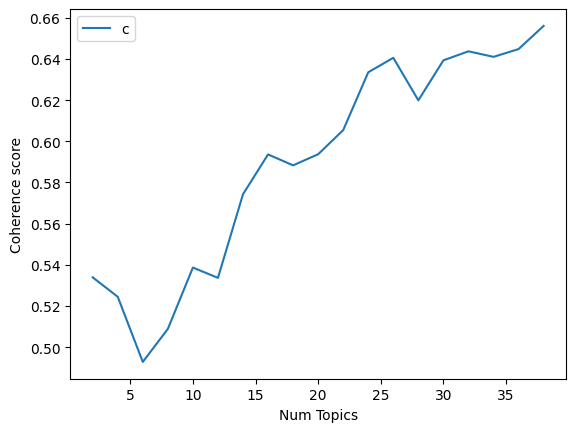

In [ ]:
 # Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Iterate over pairs of LDA models and their corresponding coherence values
# Print out the number of topics and coherence value for each model
# The zip() function pairs up the items in x and coherence_values with the same index, allowing them to be iterated over together
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5339
Num Topics = 4  has Coherence Value of 0.5245
Num Topics = 6  has Coherence Value of 0.4928
Num Topics = 8  has Coherence Value of 0.5089
Num Topics = 10  has Coherence Value of 0.5387
Num Topics = 12  has Coherence Value of 0.5337
Num Topics = 14  has Coherence Value of 0.5743
Num Topics = 16  has Coherence Value of 0.5936
Num Topics = 18  has Coherence Value of 0.5883
Num Topics = 20  has Coherence Value of 0.5937
Num Topics = 22  has Coherence Value of 0.6054
Num Topics = 24  has Coherence Value of 0.6335
Num Topics = 26  has Coherence Value of 0.6406
Num Topics = 28  has Coherence Value of 0.6199
Num Topics = 30  has Coherence Value of 0.6393
Num Topics = 32  has Coherence Value of 0.6437
Num Topics = 34  has Coherence Value of 0.641
Num Topics = 36  has Coherence Value of 0.6448
Num Topics = 38  has Coherence Value of 0.6561


In [ ]:
# Select the model and print the topics
optimal_model = model_list[14]
#model_list[4] indicates that: model_list is a list that has been defined earlier and contains the number of topics and its coherence values.
# Since I have decided 10 to be the ideal number of topics, Topics number 30 is present in the 14th place of the list.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(3,
  '0.404*"camera" + 0.112*"processor" + 0.087*"phone" + 0.068*"feature" + '
  '0.031*"pro" + 0.025*"feel" + 0.019*"sd" + 0.019*"upto" + '
  '0.012*"awesomeread" + 0.012*"decent"'),
 (21,
  '0.279*"phoneread" + 0.218*"nice" + 0.204*"productread" + 0.027*"dual" + '
  '0.027*"capture" + 0.020*"type" + 0.020*"productsread" + 0.014*"cost" + '
  '0.014*"deal" + 0.007*"resolution"'),
 (20,
  '0.559*"battery" + 0.194*"backup" + 0.027*"provide" + 0.022*"average" + '
  '0.022*"image" + 0.016*"pathetic" + 0.011*"friend" + 0.011*"amazing" + '
  '0.011*"life" + 0.011*"wasteread"'),
 (19,
  '0.222*"time" + 0.153*"work" + 0.085*"charge" + 0.057*"long" + '
  '0.045*"itread" + 0.040*"day" + 0.040*"return" + 0.034*"write" + 0.028*"lot" '
  '+ 0.023*"expect"'),
 (24,
  '0.294*"niceread" + 0.135*"quality" + 0.129*"worth" + 0.086*"productread" + '
  '0.043*"poorread" + 0.031*"size" + 0.025*"love" + 0.025*"perform" + '
  '0.012*"loud" + 0.012*"accord"'),
 (15,
  '0.179*"fast" + 0.150*"flipkart" + 0.127

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here

# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt




In [ ]:
def preprocess_data(doc_set):
    """
    Input  : document list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()  # convert to lowercase
        tokens = tokenizer.tokenize(raw)  # tokenize using regex pattern
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

# Call the preprocess_data function on the variable data, which contains a list of documents
preprocess_data(data)

[['good',
  'phone',
  'price',
  'rang',
  'batteri',
  'backup',
  'good',
  'camera',
  'ok',
  'ok',
  'perform',
  'good',
  'mi',
  'love',
  'fast',
  'deliveri',
  'flipkart',
  'thanksread'],
 ['nice',
  'mobil',
  'perform',
  'good',
  'camera',
  'qualiti',
  'good',
  'good',
  'zoom',
  'colour',
  'boost',
  'love',
  'thank',
  'flipkart',
  'read'],
 ['good', 'phone', 'nice', 'work', 'good', 'perform', 'nice', 'lookread'],
 ['mobil',
  'best',
  'price',
  'rangeprocessor',
  'qualcomm',
  'snapdragon',
  'realli',
  'power',
  'multitask',
  'gamingcamera',
  'night',
  'mode',
  'amaz',
  'batteri',
  'life',
  'outstand',
  'fabul',
  'performancer',
  'mahoveral',
  'excel',
  'perform',
  'star',
  'flipkart',
  'servicesread'],
 ['phone',
  'camera',
  'good',
  'use',
  'first',
  'phone',
  'buyerbatteri',
  'awesom',
  'heavi',
  'use',
  'also',
  'need',
  'charg',
  'day',
  'display',
  'also',
  'impres',
  'segment',
  'hd',
  'inch',
  'qualiti',
  'goo

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
number_of_topics=7
words=10

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

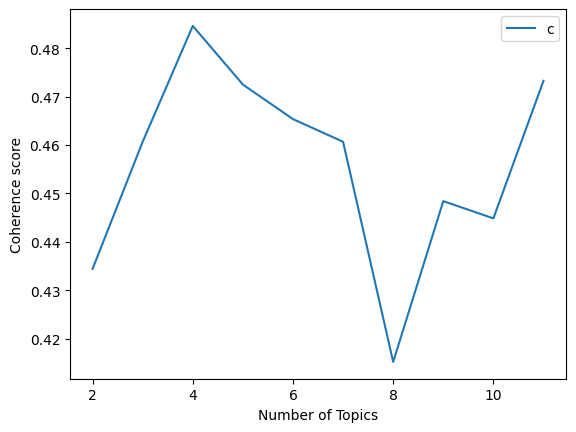

In [ ]:
start,stop,step=2,12,1
plot_graph(preprocess_data(data),start,stop,step)

In [ ]:
model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

[(0, '0.515*"good" + 0.386*"camera" + 0.374*"read" + 0.338*"phone" + 0.200*"batteri" + 0.182*"mobil" + 0.167*"charg" + 0.156*"qualiti" + 0.149*"perform" + 0.108*"price"'), (1, '0.707*"good" + -0.415*"mobil" + -0.321*"charg" + -0.155*"read" + -0.153*"camera" + -0.113*"poor" + -0.111*"bad" + -0.106*"hour" + -0.096*"hang" + -0.094*"take"'), (2, '0.742*"phone" + -0.477*"mobil" + -0.298*"good" + -0.108*"batteri" + 0.105*"buy" + 0.083*"use" + -0.077*"charg" + -0.075*"poor" + -0.070*"perform" + 0.054*"worst"'), (3, '-0.688*"camera" + -0.322*"qualiti" + 0.316*"read" + 0.297*"mobil" + 0.204*"phone" + 0.141*"charg" + -0.129*"mp" + 0.125*"nice" + 0.114*"product" + -0.110*"batteri"'), (4, '0.587*"read" + 0.454*"nice" + -0.301*"charg" + -0.254*"phone" + 0.225*"product" + -0.222*"good" + -0.183*"mobil" + -0.125*"time" + -0.109*"charger" + -0.103*"use"'), (5, '-0.520*"charg" + 0.494*"mobil" + -0.297*"read" + 0.286*"phone" + 0.255*"nice" + 0.176*"best" + 0.135*"perform" + -0.128*"slow" + -0.126*"mp" +

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here
import pyLDAvis
pyLDAvis.enable_notebook()

In [ ]:
!pip install lda2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14432 sha256=a603ca16e02427a5504252ed4b3efad6e98e937f786ed0d1da8eabc8ef51d94f
  Stored in directory: /root/.cache/pip/wheels/fa/ad/6c/38aa944b34a94fd5d4f4d48e7432f94cd97f18d15779bdc9e5
Successfully built lda2vec


In [ ]:
from google.colab import files
uploades = files.upload()

Saving topics.pyldavis.npz to topics.pyldavis.npz


In [ ]:
npz = np.load(open('/content/topics.pyldavis.npz', 'rb'), allow_pickle=True)
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()

In [ ]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 jesus god orthodox faith verse worship belief christianity christian mormon
Topic 1 bike tire honda battery brake ride valve aluminum intake jeep
Topic 2 game team play win baseball score playoff mets goal phillies
Topic 3 shuttle nasa space payload computational planetary satellite mission launch lunar
Topic 4 armenian troop cyprus israel soldier agdam bayonet terror bullet he
Topic 5 drive controller battery dock connector ink card slot pin vram
Topic 6 key encrypt cryptosystem encryption cryptography secure rsa crypto eavesdrop decrypt
Topic 7 ride revolver bike bikers go jeep i dog a tank
Topic 8 homicide gun handgun firearm fbi unconstitutional federal smuggle drug weapon
Topic 9 israel armenian plo cyprus troop lebanese arab palestinian syria turkish
Topic 10 armenian bayonet arena team turkish tartar nhl playoff game defenseman
Topic 11 widget server contrib font editor format mit pixmap toolkit binary
Topic 12 controller card disk bios rom vram drive isa vga trident
Top

In [ ]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [ ]:
pyLDAvis.display(prepared_data)

In [ ]:
data=df
data.head()

,SummaryView,Review
0,Fabulous!,Good phone in this price range battery backup...
1,Wonderful,Very nice mobile Performance is very good C...
2,Simply awesome,Good phone very nice working and good performa...
3,Wonderful,Mobile is best in this price rangeProcessor Qu...
4,Good quality product,This phone camera is not good but you can use ...


In [ ]:
#Getting Tokenization of News
tokenizer = RegexpTokenizer(r'\w+')
data['Review'] = data['Review'].apply(tokenizer.tokenize)

In [ ]:
stopwords_list = stopwords.words('english')

In [ ]:
data['Review']=data['Review'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
data['Review'].head()

0    [Good, phone, price, range, battery, backup, g...
1    [Very, nice, mobile, Performance, good, Camera...
2    [Good, phone, nice, working, good, performance...
3    [Mobile, best, price, rangeProcessor, Qualcomm...
4    [This, phone, camera, good, use, first, phone,...
Name: Review, dtype: object

In [ ]:
#Description of news text information
all_words = [word for tokens in data['Review'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data['Review']]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

7745 words total, with a vocabulary size of 1709
Max sentence length is 56


In [ ]:
from collections import Counter
counter = Counter(all_words)
counter.most_common(20)

[('MORE', 990),
 ('READ', 283),
 ('good', 200),
 ('phone', 165),
 ('camera', 127),
 ('Good', 115),
 ('I', 112),
 ('Very', 107),
 ('mobile', 106),
 ('quality', 98),
 ('Nice', 78),
 ('GoodREAD', 78),
 ('Camera', 77),
 ('product', 73),
 ('battery', 69),
 ('charging', 64),
 ('price', 60),
 ('bad', 58),
 ('performance', 52),
 ('nice', 52)]

In [ ]:
from collections import Counter

# Create a new Counter object called 'counted_words', using the 'all_words' list as input
counted_words = Counter(all_words)

# Create two empty lists to store the top 25 words and their counts
words = []
counts = []

# Loop through the 25 most common words and their counts in 'counted_words'
for word, count in counted_words.most_common(25):
    # Append the current word to the 'words' list
    words.append(word)
    # Append the current count to the 'counts' list
    counts.append(count)

In [ ]:
def LDA_topics(model, num_topics):
    # create an empty dictionary to store the topic words
    word_dict = {}
    # loop through each topic
    for i in range(num_topics):
        # get the top 10 words of the current topic
        words = model.show_topic(i, topn=10)
        # store the top words in a list in the dictionary
        word_dict['Words of Topic ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    # return a pandas dataframe with the topic words
    return pd.DataFrame(word_dict)

In [ ]:
data_text=pd.DataFrame(data['Review'])
data_text=data_text.rename(columns={'Review':'Review'})

In [ ]:
train_ = [value[0] for value in data_text.iloc[0:].values]

In [ ]:
num_topics = 20

In [ ]:
id2word1 = gensim.corpora.Dictionary(train_)

In [ ]:
corpus1 = [id2word1.doc2bow(text) for text in train_]

In [ ]:
#Calling the LDA model and feeding the calculated text, dictionary and topics
from gensim.models import ldamodel
lda2vec = ldamodel.LdaModel(corpus=corpus1, id2word=id2word1, num_topics=num_topics)

In [ ]:
#Calling LDA_topics function and using lda2vec with selective topics
LDA_topics(lda2vec, num_topics)

,Words of Topic 01,Words of Topic 02,Words of Topic 03,Words of Topic 04,Words of Topic 05,Words of Topic 06,Words of Topic 07,Words of Topic 08,Words of Topic 09,Words of Topic 10,Words of Topic 11,Words of Topic 12,Words of Topic 13,Words of Topic 14,Words of Topic 15,Words of Topic 16,Words of Topic 17,Words of Topic 18,Words of Topic 19,Words of Topic 20
0,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE,MORE
1,good,good,phone,GoodREAD,phone,READ,READ,READ,good,READ,Good,Good,good,READ,READ,camera,GoodREAD,phone,quality,Redmi
2,phone,phone,READ,Best,READ,Very,Good,mobile,READ,GoodREAD,good,READ,READ,Very,GoodREAD,READ,Nice,good,phone,READ
3,READ,camera,I,phone,mobile,phone,I,Good,Very,Nice,READ,I,mobile,bad,best,good,READ,camera,READ,SuperbREAD
4,Nice,READ,good,READ,bad,mobile,good,bad,phone,quality,productREAD,good,battery,I,phoneREAD,quality,good,I,good,quality
5,Good,Nice,Very,Camera,good,camera,Camera,Very,Battery,good,camera,product,Very,nice,charging,price,Very,READ,Camera,using
6,Very,quality,budget,good,battery,battery,Nice,I,Good,phone,like,Nice,camera,price,Very,mobile,NiceREAD,price,battery,charge
7,I,price,mp,problem,Camera,charging,productREAD,product,price,mobile,phone,niceREAD,I,goodREAD,call,also,camera,Good,camera,takes
8,Best,I,device,I,Very,performance,mobile,camera,product,Camera,qualityREAD,GoodREAD,charging,phone,WORST,slow,product,moneyREAD,product,Worst
9,GoodREAD,nice,mobile,product,performance,poor,issue,Best,I,camera,delivery,camera,time,camera,cemeraAnd,awesome,Just,phoneREAD,nice,writing


In [ ]:
#Computing the Topic Coherence with 20
coherence_using_lda2vec = CoherenceModel(model=lda2vec, texts=train_, dictionary=id2word1, coherence='c_v')
coherence = coherence_using_lda2vec.get_coherence()
print('Coherence Score: ', round(coherence, 3))

Coherence Score:  0.494


In [ ]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda2vec, 
                              corpus=corpus1, 
                              dictionary=id2word1)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

df['Review'] = df['Review'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,SummaryView,Review
0,Fabulous!,'good ' 'phone ' 'price ' 'range ' 'battery '...
1,Wonderful,'very ' 'nice ' 'mobile ' 'performance ' 'goo...
2,Simply awesome,'good ' 'phone ' 'nice ' 'working ' 'good ' '...
3,Wonderful,'mobile ' 'best ' 'price ' 'rangeprocessor ' ...
4,Good quality product,'this ' 'phone ' 'camera ' 'good ' 'use ' 'fi...


In [ ]:
! pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 49.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  

In [ ]:
from bertopic import BERTopic

In [70]:
reviews = df['Review'].tolist()

In [71]:
topic_model = BERTopic(language="english")
topics = topic_model.fit_transform(reviews)

In [72]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,102,-1_value_product_more_superbread
1,0,290,0_camera_phone_quality_good
2,1,94,1_goodread_more_averageread_all
3,2,53,2_niceread_more_verry_very
4,3,49,3_charging_slow_charger_watt
5,4,38,4_phone_best_price_priceread
6,5,38,5_very_read_good_more
7,6,32,6_product_read_range_products
8,7,30,7_productread_good_more_product
9,8,26,8_flipkartread_thanks_flipkart_thank


In [73]:
topic_model.visualize_topics()

In [74]:
topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [75]:
topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

In [76]:
bigram_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, n_gram_range=(2, 2))
bigram_topics, bigram_probs = bigram_topic_model.fit_transform(reviews)

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

2023-04-03 18:05:19,603 - BERTopic - Transformed documents to Embeddings
2023-04-03 18:05:23,842 - BERTopic - Reduced dimensionality
2023-04-03 18:05:23,923 - BERTopic - Clustered reduced embeddings


In [77]:
bigram_freq = bigram_topic_model.get_topic_info() 
bigram_freq

,Topic,Count,Name
0,-1,125,-1_read more_superbread more_happyread more_mo...
1,0,230,0_camera quality_read more_more camera_battery...
2,1,94,1_more goodread_goodread more_more averageread...
3,2,54,2_niceread more_more niceread_very niceread_mo...
4,3,45,3_more battery_charging slow_more charging_slo...
5,4,41,4_mobileread more_more mobile_good mobileread_...
6,5,41,5_more best_best phone_phone price_nice phone
7,6,40,6_good read_read more_more very_very nice
8,7,40,7_good product_moneyread more_value moneyread_...
9,8,33,8_flipkartread more_more thanks_thanks flipkar...


In [78]:
bigram_topic_model.visualize_topics()

In [79]:
bigram_topic_model.visualize_hierarchy(top_n_topics=12, width = 700, height = 700)

In [80]:
bigram_topic_model.visualize_barchart(top_n_topics=12, n_words = 10, width = 350, height = 350)

In [81]:
bigram_topic_model.visualize_heatmap(top_n_topics=12, width=800, height=800)

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

When comparing the four topic modeling algorithms (LDA, LSA, Lda2vec, Berttopic) for analyzing 1000 phone reviews on Flipkart, there are various factors to consider beyond coherence scores. LDA and LSA are traditional algorithms that use matrix factorization, while Lda2vec and Berttopic are newer algorithms based on deep learning.

LDA assumes that each document is a mixture of topics, and each topic is a probability distribution over words. It can identify latent topics and assign each document a probability distribution over them. However, it assumes that topics are independent, which may not always be true. LSA represents documents and words in a high-dimensional space and reduces it using SVD. It can identify underlying concepts but cannot handle out-of-vocabulary words.

Lda2vec combines LDA with word2vec, a neural network-based algorithm, to capture the semantics of words and topics but requires a large amount of training data. Berttopic is based on BERT, a deep learning-based algorithm that captures the context and meaning of words but requires substantial computational resources and training data.

Choosing the best algorithm depends on the specific use case and requirements. LDA and LSA are more established and may be better suited for small datasets that prioritize interpretability, while Lda2vec and Berttopic may be more accurate and suitable for larger datasets.